Introduction : There is strength of unity - and that unity forms the basics of ensemble learning methods tnat combine the multiple weak models to produce a more powerful model. In more technical terms of machine learing in bagging we using same model for training 

Some imports

In [30]:
# Numerical analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
import seaborn as sns


# Data allocation and Splitting
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_classification

# Statistical Functions
from scipy.stats import mode

#Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

#Model Evaluation and Metrics
from sklearn.metrics import accuracy_score




***Decision Tree*** : We predict that esch observation belongs to the  most commonly occuring class of training observations in the regions which it belongs.

***Classification region*** : A two dimentional classfication example in which true decision boundary is linear.

In [31]:
def train_and_evaluate_decision_tree(X_train, X_test, y_train, y_test):
    decision_tree = DecisionTreeClassifier(random_state=42)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Decision Accuracy:", accuracy)
    return accuracy, decision_tree

def plot_decision_regions_for_classifier(X_test, y_test, classifier):
    plot_decision_regions(X_test, y_test, clf=classifier, legend=2)
    plt.show()

***Bagging ensemble*** : The decision tree suffer from high varience, Bootstrap aggeration or Bagging is a genarel purpose procedure for reducing the varience.  We can sampling the dataset with replacement and calculate the predicition with different decision tree and average then with respect to mejority voting. 

In [32]:
def sklearn_train_and_evaluate_bagging_classifier(X_train, X_test, y_train, y_test, num_estimators=10):
    base_decision_tree = DecisionTreeClassifier(random_state=42)
    bagging_model = BaggingClassifier(base_estimator=base_decision_tree, n_estimators=num_estimators, random_state=42)
    bagging_model.fit(X_train, y_train)
    y_pred = bagging_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Bagging Model Accuracy:", accuracy)
    return accuracy, bagging_model

In [33]:
def defined_train_and_evaluate_bagging_ensemble(num_of_decision_trees, X_train, X_test, y_train, y_test):
    decision_trees = []
    for _ in range(num_of_decision_trees):
        index = np.random.choice(len(X_train), len(X_train), replace=True)
        X_sample = X_train[index]
        y_sample = y_train[index]
        base_model = DecisionTreeClassifier(random_state=42)
        base_model.fit(X_sample, y_sample)
        decision_trees.append(base_model)

    predictions = []
    for tree in decision_trees:
        prediction = tree.predict(X_test)
        predictions.append(prediction)

    final_pred = mode(predictions, axis=0)[0]
    accuracy = accuracy_score(y_test, final_pred)
    print("Bagging Accuracy:", accuracy)
    return accuracy, decision_trees

Prediction using Bagging 

## Random forest

We build a number of decision tree with bootstraped training samples or subset of features and predict with different decision tree and average the result.

In [34]:
def train_and_evaluate_random_forest(X_train, X_test, y_train, y_test, num_estimators=100):
    random_forest = RandomForestClassifier(n_estimators=num_estimators, random_state=42)
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Random Forest Accuracy:", accuracy)
    return accuracy, random_forest


In [35]:
def plot_train_test_data(X_train, X_test, y_train):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=150, alpha=0.4, cmap='viridis', label='Training data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c='red', s=20, alpha=1.0, label='Test Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

In [36]:
def plot_decision_trees_bagging(decision_trees):
    plt.figure(figsize=(15, 10))
    for i, tree in enumerate(decision_trees):
        plt.subplot(2, 5, i+1)
        plot_tree(tree, filled=True, feature_names=['F1', 'F2'], class_names=['C0', 'C1'])
        plt.title('DT {}'.format(i+1))

In [37]:
def plot_decision_regions_individual_trees(X_test, y_test, decision_trees):
    plt.figure(figsize=(15, 10))
    for i, tree in enumerate(decision_trees):
        plt.subplot(2, 5, i+1)
        plot_decision_regions(X=X_test, y=y_test, clf=tree, legend=2)
        plt.title('Decision Tree {}'.format(i+1))
    plt.show()

In [ ]:
def plot_decision_estimators_random_forest(rf1):
    plt.figure(figsize=(15, 10))
    for i, tree in enumerate(rf1.estimators_):
        plt.subplot(5, 5, i + 1)
        plot_tree(tree, filled=True)
        plt.title('DT {}'.format(i + 1))
    plt.show()

In [ ]:
def plot_individual_tree_sklearn_bagging(decision_trees):
    plt.figure(figsize=(15, 10))
    for i, tree in enumerate(decision_trees):
        plt.subplot(2, 5, i+1)
        plot_tree(tree, filled=True, feature_names=['F0', 'F1'], class_names=['C0', 'C1', 'C2', 'C3'])
        plt.title('Decision Tree {}'.format(i+1))
    plt.show()

## Implementation on make_moon dataset

make_moons is classification dataset where class value is bainary and we add some noise and genarate random samples.

In [38]:
X, y = make_moons(n_samples=1000, noise=0.3 , random_state=42 )

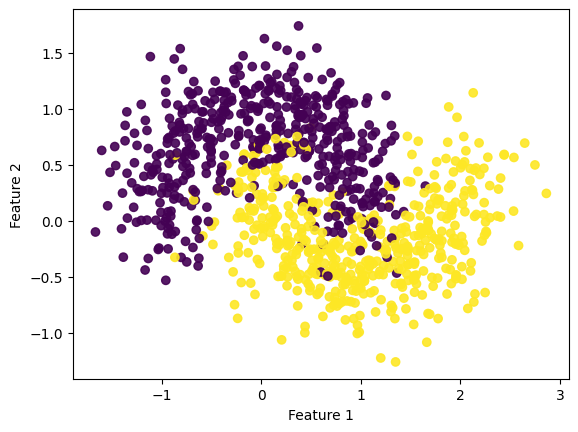

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.9, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

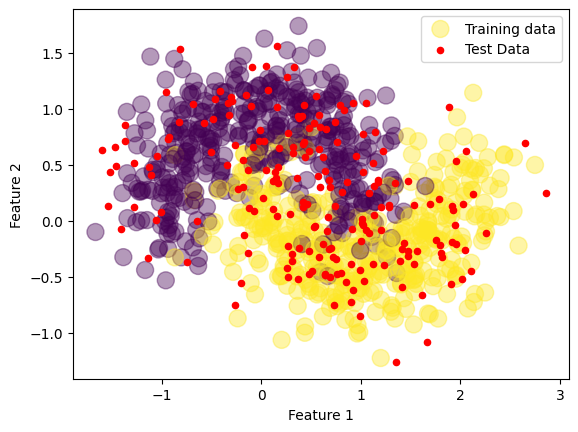

In [41]:
plot_train_test_data(X_train, X_test, y_train)

In [42]:
acc3, dt2 = train_and_evaluate_decision_tree(X_train, X_test, y_train, y_test)


Decision Accuracy: 0.91


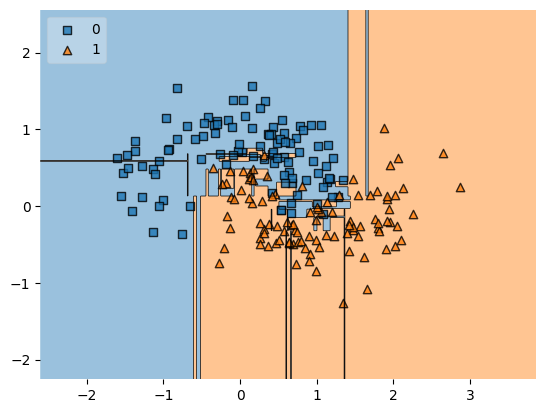

In [43]:
plot_decision_regions_for_classifier(X_test,y_test,dt2)

[Help: github](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/)

[Help : Stackoverflow](https://stackoverflow.com/questions/50538626/plot-the-decision-surface-of-a-classification-decision-tree-with-3-features-on-a)

Plot  indivisual decision tree of bagging

In [44]:
acc_bag1, bag_dt1= sklearn_train_and_evaluate_bagging_classifier(X_train, X_test, y_train, y_test)

Bagging Model Accuracy: 0.895


/home/rishabh.mondal/miniconda3/envs/torch_gpu/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [45]:
acc3,dt3=defined_train_and_evaluate_bagging_ensemble(10,X_train,X_test,y_train,y_test)

Bagging Accuracy: 0.89


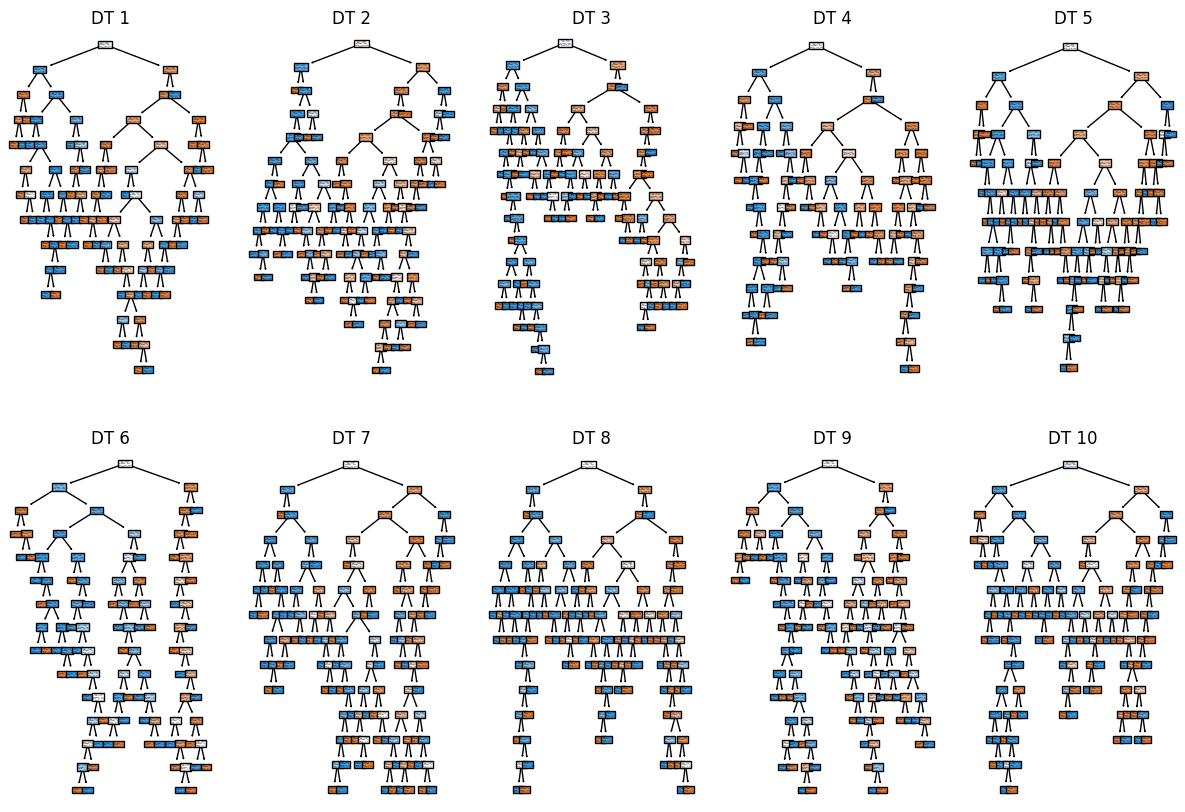

In [46]:
plot_decision_trees_bagging(dt3)

Visualize the decision surface of each decision tree of bagging

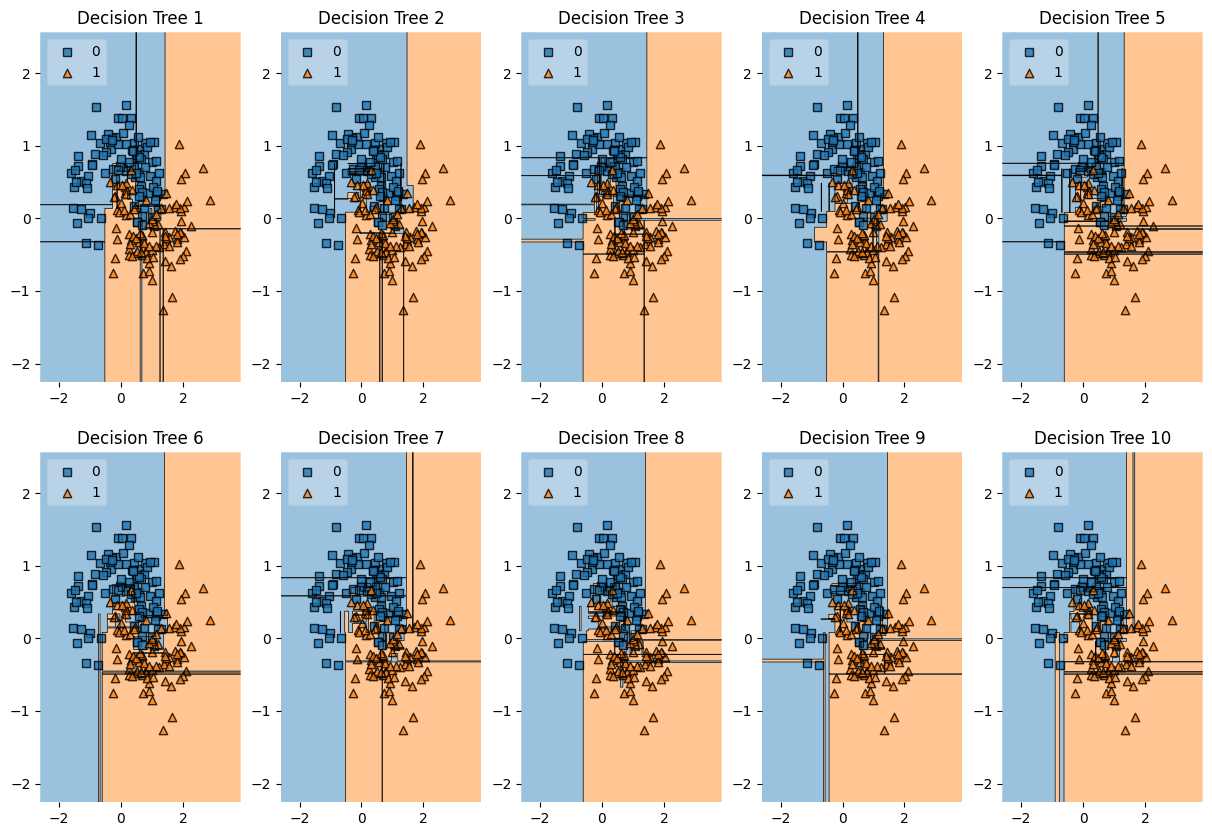

In [47]:
plot_decision_regions_individual_trees(X_test, y_test, dt3)


## Implementation on make_classification dataset

In [60]:
X, y = make_classification(
    n_samples=100,
    n_features=2,        
    n_redundant=0,        
    n_classes=4,          
    n_clusters_per_class=1,  
    flip_y=0.1,          
    random_state=42
)

/home/rishabh.mondal/miniconda3/envs/torch_gpu/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


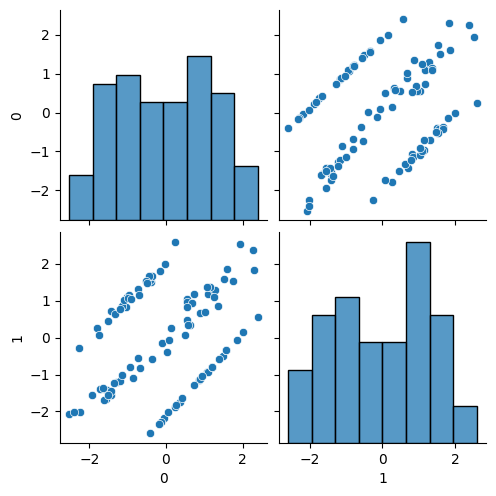

In [58]:
df = pd.DataFrame(X)
sns.pairplot(df);

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

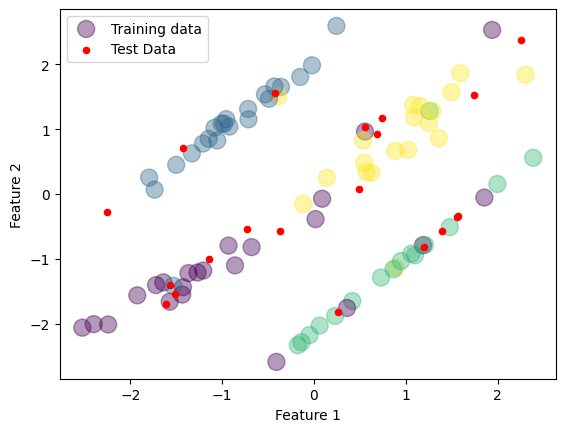

In [63]:
plot_train_test_data(X_train,X_test,y_train)


In [65]:
acc4,dt4 = train_and_evaluate_decision_tree(X_train,X_test,y_train,y_test)

Decision Accuracy: 0.45


/home/rishabh.mondal/miniconda3/envs/torch_gpu/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


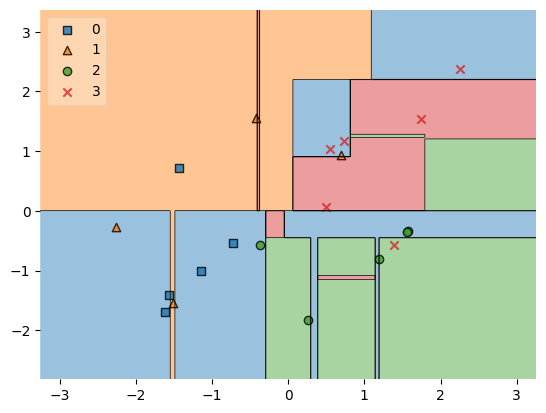

In [68]:
plot_decision_regions_for_classifier(X_test,y_test,dt4)

In [69]:
acc_bag2, bag_dt2= defined_train_and_evaluate_bagging_ensemble(10,X_train, X_test, y_train, y_test)

Bagging Accuracy: 0.35


In [72]:
acc5,dt5=sklearn_train_and_evaluate_bagging_classifier(X_train,X_test,y_train,y_test)

Bagging Model Accuracy: 0.55


/home/rishabh.mondal/miniconda3/envs/torch_gpu/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


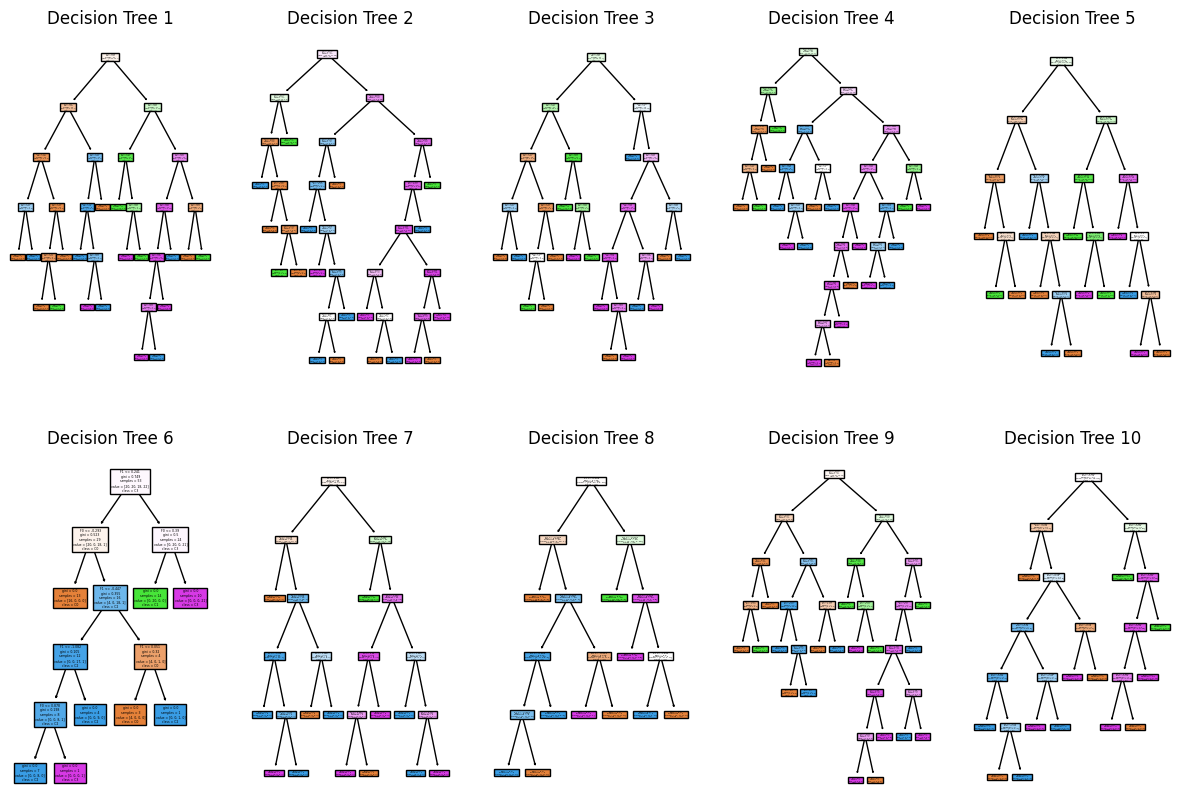

In [78]:
plot_individual_tree_sklearn_bagging(dt5)

## Random forest 

In [76]:
rf_acc,rf1 = train_and_evaluate_random_forest(X_train, X_test, y_train, y_test)

Random Forest Accuracy: 0.55


ValueError: num must be an integer with 1 <= num <= 25, not 26

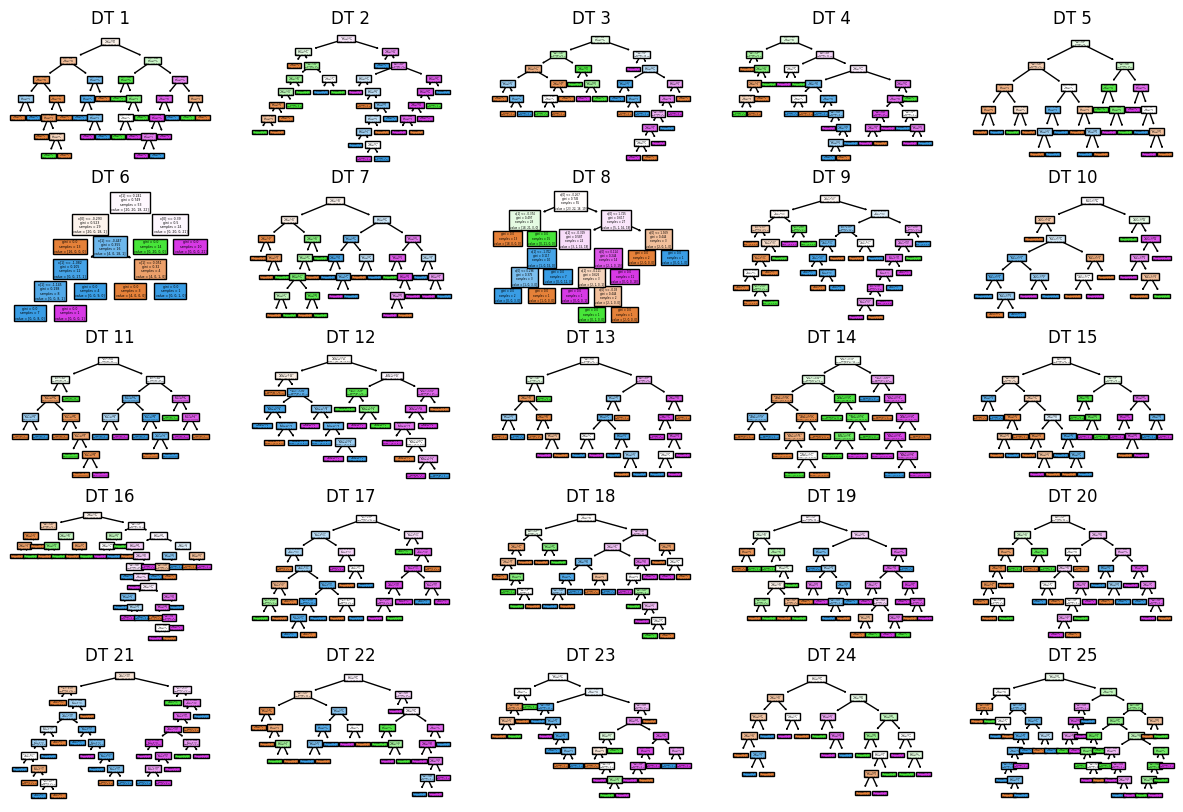

In [81]:
plot_decision_estimators_random_forest(rf1)

## Gradient Decent

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(X.shape, y.shape)


(1000, 2) (1000,)


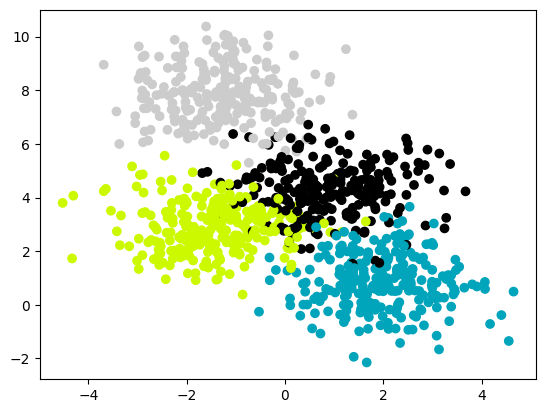

In [ ]:

plt.scatter(X[:,0], X[:,1], c=y, cmap='nipy_spectral')
plt.show()

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y.shape)

(800, 2) (200, 2) (1000,)


In [ ]:
import torch
X_train, y_train, X_test, y_test = map(torch.tensor, (X_train, Y_train, X_test,y_test ))


In [ ]:
print(X_train.shape, Y_train.shape)

     

torch.Size([800, 2]) (800,)


In [ ]:
a = torch.rand([2, 4])
print(a)
print(a.exp())
print(a.exp().sum())
print(a.exp().sum(0))
print(a.exp().sum(-1))
print(a.exp().sum(-1).unsqueeze(-1))

tensor([[0.3297, 0.6163, 0.8764, 0.0793],
        [0.8851, 0.0501, 0.7255, 0.7375]])
tensor([[1.3906, 1.8521, 2.4023, 1.0825],
        [2.4233, 1.0513, 2.0658, 2.0908]])
tensor(14.3587)
tensor([3.8139, 2.9035, 4.4681, 3.1733])
tensor([6.7275, 7.6312])
tensor([[6.7275],
        [7.6312]])


In [ ]:

def model(x):
  a1 = torch.matmul(x, weights1) + bias1 # (N, 2) x (2, 2) -> (N, 2)
  h1 = a1.sigmoid() # (N, 2)
  a2 = torch.matmul(h1, weights2) + bias2 # (N, 2) x (2, 4) -> (N, 4)
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1) # (N, 4) #softmax
  return h2

In [ ]:
import math
weights1 = torch.randn(2, 2) 
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) 
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

In [ ]:
y = torch.tensor([1, 0])
y_hat = torch.tensor([[0.1, 0.2, 0.3, 0.4], [0.8, 0.1, 0.05, 0.05]])

def loss_fn(y_hat, y):
  return -(y_hat[range(y.shape[0]), y].log()).mean()

In [ ]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

In [ ]:
learning_rate = 0.2
epochs = 10000

loss_arr = []
acc_arr = []
X_train = X_train.float()
Y_train = Y_train.long()

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = loss_fn(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()


AttributeError: 'numpy.ndarray' object has no attribute 'long'

In [ ]:
plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])